In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
max_features = 2000 #No . of words to consider as features
maxlen = 500 #Chop texts after maxlen from top max_features

In [3]:
# imdb offers a function to return vectorized data. 
# In case imdb data (imdb.npz) is not present on the machine then it will be downloaded 
# locally (at '~/.keras/datasets/' + path)
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words=max_features)

In [4]:
#We need to make the sequences equal length. Keras pad_sequence offers this functionality. pad_sequence only works
#with scalaras
x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)

In [5]:
# Time to create the model. 
#This is just a dummy model to demonstrate the tensorboard. Accuracy had loss values are immaterial here
model = Sequential()
model.add(layers.Embedding(max_features,128,input_length = maxlen,name='embed'))
model.add(layers.Conv1D(32,7, activation='relu'))
model.add(layers.MaxPool1D(5))
model.add(layers.Conv1D(32,7, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [7]:
#Create a directory for the tensorboard callback files generator. Note that %mkdir is shell command 
#and not a python statement
%mkdir tensorflow_log_dir

mkdir: tensorflow_log_dir: File exists


In [8]:
#Callback to log histogram and embedding data every epoch
callbacks = [keras.callbacks.TensorBoard(log_dir='tensorflow_log_dir',histogram_freq=1,embeddings_freq=1)]

In [9]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)



Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 57s 3ms/step - loss: 0.6414 - acc: 0.6484 - val_loss: 0.4076 - val_acc: 0.8360
Epoch 2/20
20000/20000 [==============================] - 56s 3ms/step - loss: 0.4519 - acc: 0.8137 - val_loss: 0.8945 - val_acc: 0.6344
Epoch 3/20
20000/20000 [==============================] - 55s 3ms/step - loss: 0.4069 - acc: 0.7926 - val_loss: 0.5376 - val_acc: 0.7418
Epoch 4/20
20000/20000 [==============================] - 55s 3ms/step - loss: 0.3457 - acc: 0.7669 - val_loss: 0.6191 - val_acc: 0.7188
Epoch 5/20
20000/20000 [==============================] - 56s 3ms/step - loss: 0.3029 - acc: 0.7227 - val_loss: 0.5632 - val_acc: 0.6870
Epoch 6/20
20000/20000 [==============================] - 55s 3ms/step - loss: 0.2673 - acc: 0.6592 - val_loss: 0.6246 - val_acc: 0.6404
Epoch 7/20
20000/20000 [==============================] - 55s 3ms/step - loss: 0.2095 - acc: 0.6336 - val_loss: 0.7872 - val_acc:

In [10]:
#Keras offers a way to model as layers. This helps in visualizing the model better for debugging purposes
#keras plot model is dependent on pydot and graphviz

In [11]:
from keras.utils import plot_model
plot_model (model, show_shapes = True, to_file = 'model.png')

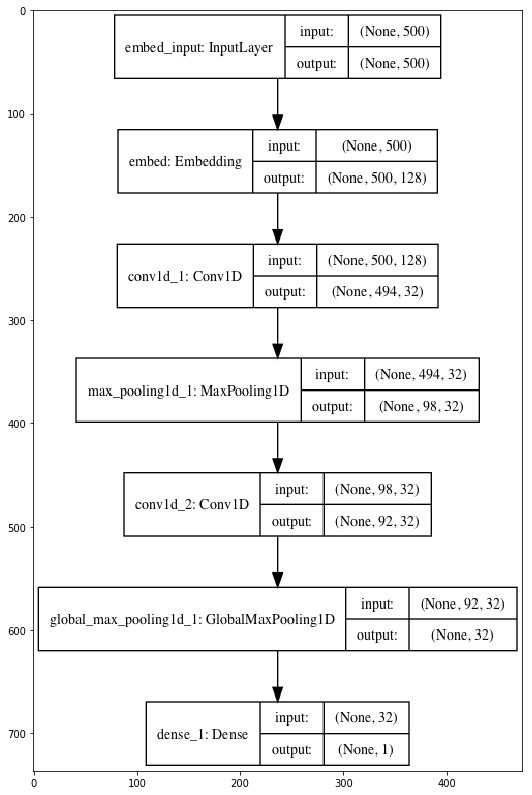

In [27]:
#%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('model.png')
plt.rcParams["figure.figsize"] = [15, 14]
imgplot = plt.imshow(img)
plt.show()
